In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Reading the data into a dataframe
titanic_df = pd.read_csv('titanic_train.csv')

In [3]:
#Reading the head of the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [4]:
# Checking the percentage of missing values in each column
(titanic_df.isnull().sum()/len(titanic_df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

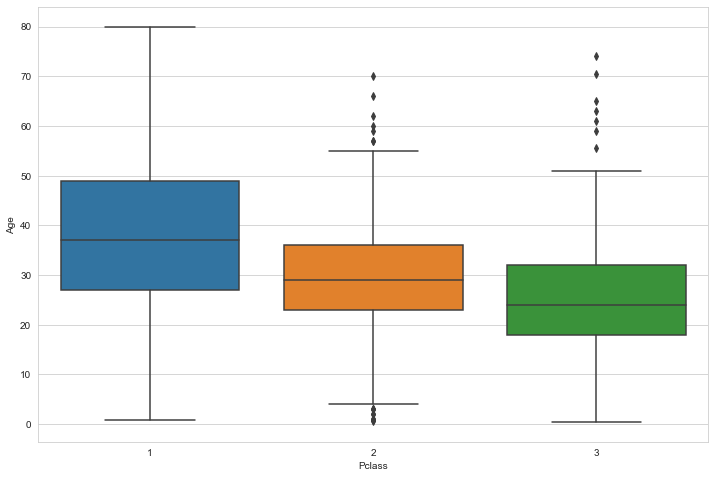

In [5]:
# Visualize Passenger class by Age to fill the age Column
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Pclass', y= 'Age', data = titanic_df)

In [6]:
# From the boxplot, we can get the average ages based on the passenger's class and then impute it into the missing values
# Creating a funtion to impute the average ages based on class
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 47
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
# Applying the impute function to replace missing values in the age column
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(impute, axis=1)

## Exploratory Analysis

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.403109,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.565523,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[Text(0.5, 1.0, 'A count plot of Number of people that survived and those that did not')]

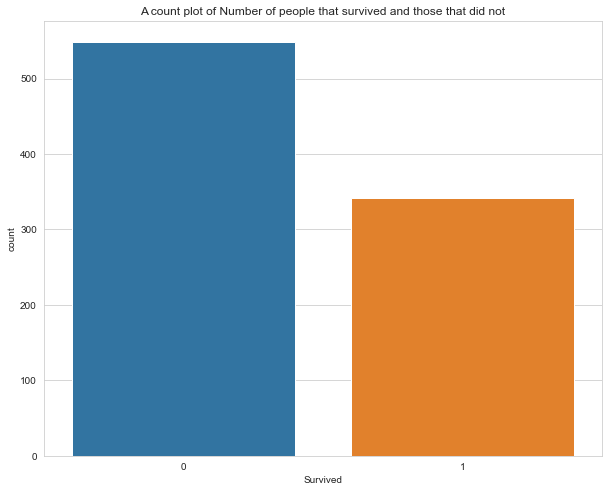

In [10]:
# visualizations
plt.figure(figsize=(10,8))
sns.countplot(x='Survived', data = titanic_df).set(title = "A count plot of Number of people that survived and those that did not")

[Text(0.5, 1.0, 'A count plot of Number of people that survived Based on Sex')]

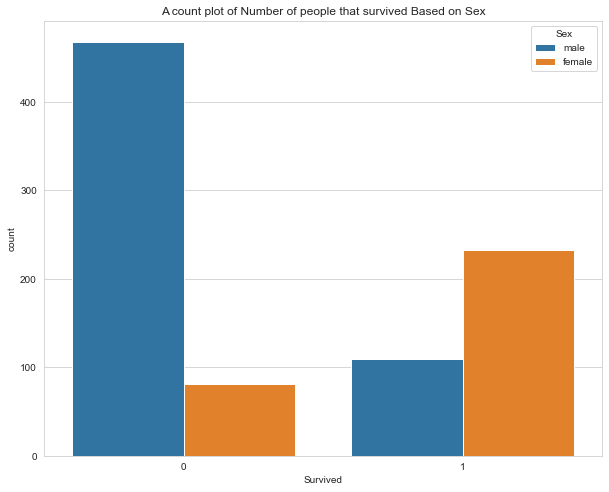

In [11]:
# visualizations
plt.figure(figsize=(10,8))
sns.countplot(x='Survived', data = titanic_df, hue = 'Sex').set(title = "A count plot of Number of people that survived Based on Sex")

[Text(0.5, 1.0, 'A count plot of Number of people that survived and those that did not based on passenger class')]

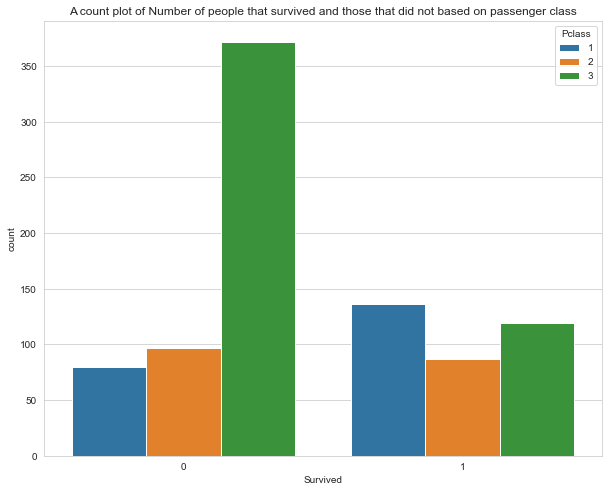

In [12]:
# visualizations
plt.figure(figsize=(10,8))
sns.countplot(x='Survived', data = titanic_df, hue = 'Pclass').set(title = "A count plot of Number of people that survived and those that did not based on passenger class")

[Text(0.5, 1.0, 'Distribution of Age')]

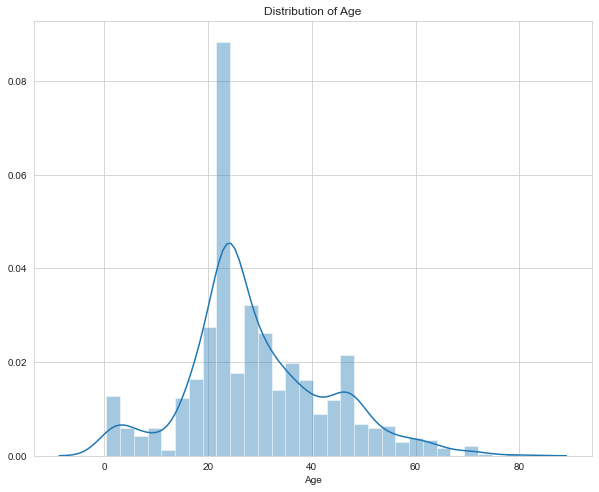

In [13]:
# Distribution of Age
plt.figure(figsize = (10,8))
sns.distplot(titanic_df['Age'], bins = 30).set(title = 'Distribution of Age')

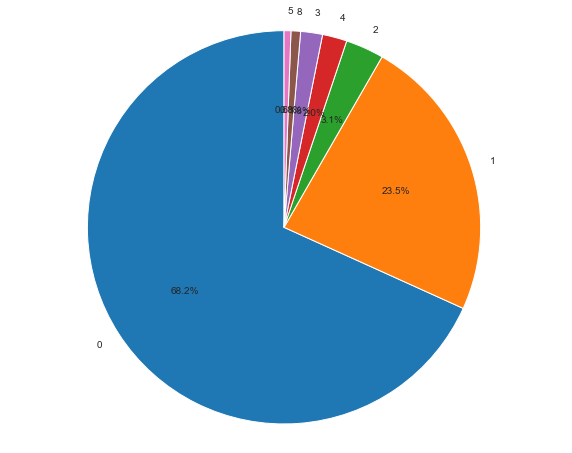

In [14]:
# Pie chart for Nummber of siblings or spouse a passenger had
SibSp = titanic_df['SibSp'].value_counts()
SibSp = SibSp.sort_values(ascending = False)
plt.figure(figsize = (10,8))
plt.pie(SibSp, labels=SibSp.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal');

## Preparing Data for the machine learning Algorithm

In [15]:
# Dropping the cabin column since it has too many missing values and also droping all missing values in all columns
titanic_df.drop(columns='Cabin', inplace = True)
titanic_df.dropna(inplace = True)

In [16]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
# Dealing with Categorical Variables
Sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
Embarked = pd.get_dummies(titanic_df['Embarked'], drop_first=True)

In [18]:
#Adding the new columns to the Dataframe
titanic_df = pd.concat([titanic_df, Sex, Embarked], axis=1)

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [20]:
# Dropping all Columns that will not be needed
titanic_df.drop(columns=['PassengerId','Name', 'Sex', 'Ticket', 'Embarked'], inplace = True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Training and Testing of the Model

In [21]:
# Splitting data into dependent and independent Variables
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [22]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [23]:
# Creating the model
model = LogisticRegression()

In [24]:
# fitting the data on the model
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
prediction = model.predict(X_test)

In [26]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.71      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267

